### Structure de bandes électroniques

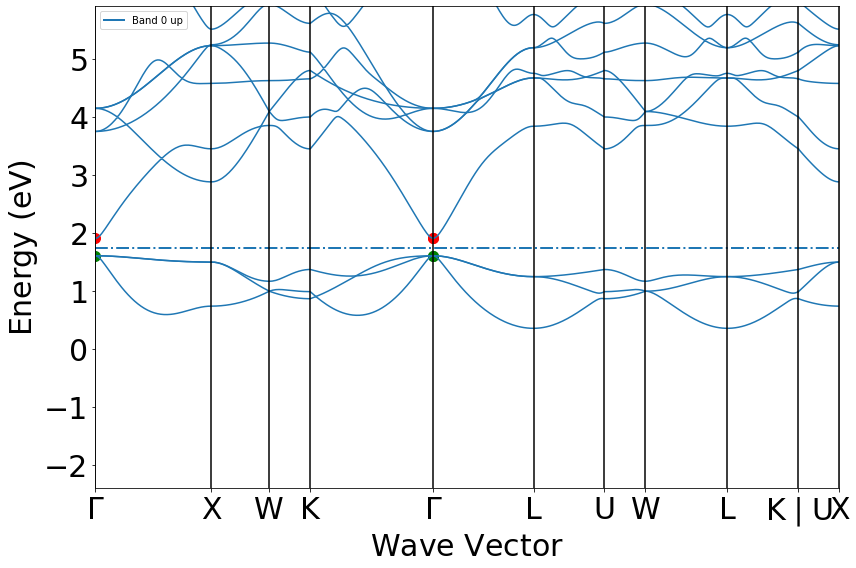

In [17]:
import matplotlib.pyplot as plt
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.ext.matproj import MPRester
with MPRester("6t2dQIcMaNaz6nTZlWm") as m:

    # Structure de bandes électroniques du matériau attribué
    bandstructure = m.get_bandstructure_by_material_id("mp-867339")
    
#plot de la structure de bandes
plotter = BSPlotter(bandstructure)
plotter.get_plot(zero_to_efermi=False, vbm_cbm_marker=True)
plt.show()

### Bande interdite

In [16]:
#bande interdite
gap = bandstructure.get_band_gap()

#on détermine si le gap est direct ou indirect
if gap['direct'] == True:
    typegap = "direct"
else:
    typegap = "indirect"
energy = gap['energy']
transition = gap['transition']

print("La bande interdite a un gap", typegap, "d'énergie", energy, "eV")
print("On observe cette bande interdite lorsque le vecteur d'onde k évolue dans la direction", transition)

La bande interdite a un gap direct d'énergie 0.30099999999999993 eV
On observe cette bande interdite lorsque le vecteur d'onde k évolue dans la direction \Gamma-\Gamma


In [4]:
#bandes de valence et conduction
bands = bandstructure.bands
kpoints = bandstructure.kpoints #list of kpoints for each band
vbm = bandstructure.get_vbm() #valence band maximums
cbm = bandstructure.get_cbm() #conduction band minimums
last = list(vbm['band_index'].items())[0][1][-1] #dernière bande de valence
first = list(cbm['band_index'].items())[0][1][0] #première bande de conduction
print('Dernière bande de valence =',last)
print('Première bande de conduction =', first)



dernière bande de valence =  15
première bande de conduction =  16


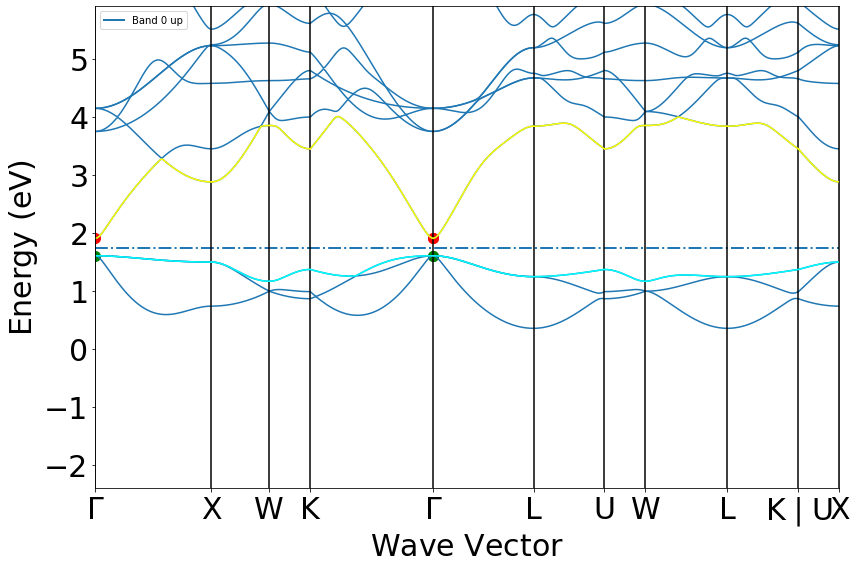

In [13]:
#données
data = plotter.bs_plot_data(zero_to_efermi=False)
x = data.get('distances') #données sur l'axe x
y = data.get('energy').get('1') #énergies des bandes = axe y
distances = data.get('ticks').get('distance') 
plotter.get_plot(zero_to_efermi=False, vbm_cbm_marker=True)
for i in range(len(x)):
    plt.plot(x[i],y[i][last],'cyan', label = "dernière bande de valence")
    plt.plot(x[i],y[i][first],'yellow', label = "première bande de conduction")
plt.show()


### Dispersion

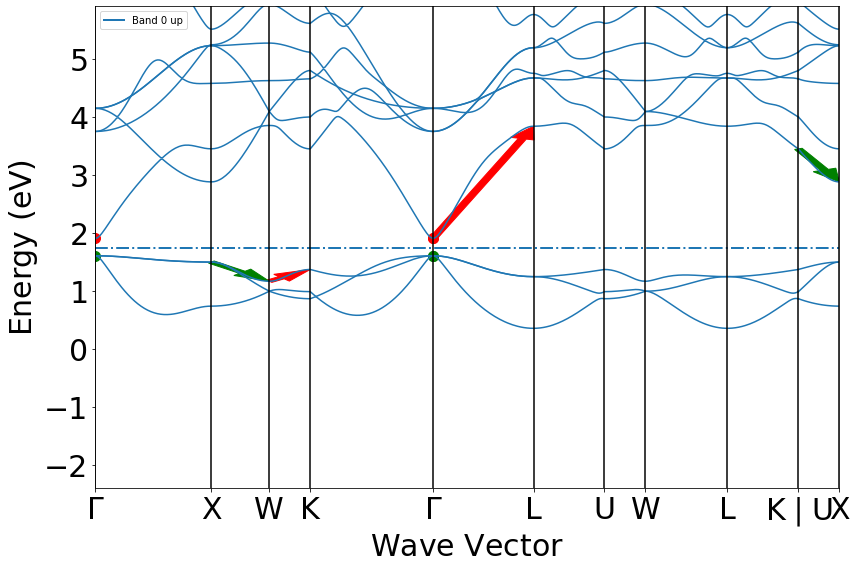

In [6]:
import numpy as np
#dispersion = pente 
dispersion_last = np.zeros(len(x))
dispersion_first = np.zeros(len(x))
for i in range(len(x)):
    dispersion_first[i] = (y[i][first][-1]-y[i][first][0])/(x[i][-1]-x[i][0])
    dispersion_last[i] = (y[i][last][-1]-y[i][last][0])/(x[i][-1]-x[i][0])

index_max_first = np.argmax(dispersion_first)
index_min_first = np.argmin(dispersion_first)
index_max_last = np.argmax(dispersion_last)
index_min_last = np.argmin(dispersion_last)

plotter.get_plot(zero_to_efermi=False, vbm_cbm_marker=True)
plt.arrow(x[index_max_first][0], y[index_max_first][first][0], (x[index_max_first][-1]-x[index_max_first][0]), 
          (y[index_max_first][first][-1]-y[index_max_first][first][0]),color='red',width = 0.05,length_includes_head =True )
plt.arrow(x[index_min_first][0], y[index_min_first][first][0], (x[index_min_first][-1]-x[index_min_first][0]), 
          (y[index_min_first][first][-1]-y[index_min_first][first][0]),color='green',width = 0.05,length_includes_head =True )
plt.arrow(x[index_max_last][0], y[index_max_last][last][0], (x[index_max_last][-1]-x[index_max_last][0]), 
          (y[index_max_last][last][-1]-y[index_max_last][last][0]),color='red',width = 0.05,length_includes_head =True )
plt.arrow(x[index_min_last][0], y[index_min_last][last][0], (x[index_min_last][-1]-x[index_min_last][0]), 
          (y[index_min_last][last][-1]-y[index_min_last][last][0]),color='green',width = 0.05,length_includes_head =True )
plt.show()                                        

##### Calcul de la masse effective
La masse effective est définie par le tenseur d'ordre 2 des dérivées secondes de l'énergie E par rapport au vecteur d'onde k. $ m_{ij}* = (\frac{\partial^2 E}{\partial k_i k_j})^{-1} $

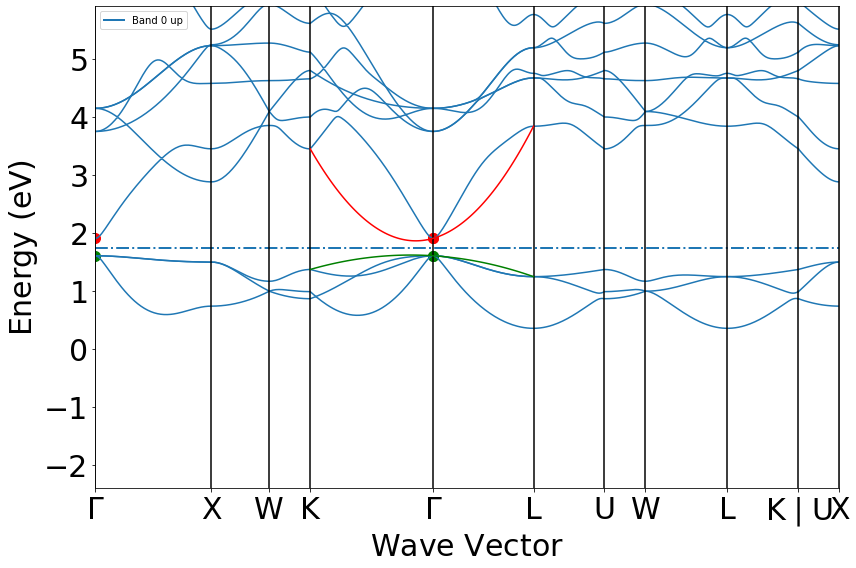

La masse effective au sommet de la dernière bande de valence vaut 3.247403801708109e-31 [kg].
La masse effective à la base de la première bande de conduction vaut 5.618700000375593e-32 [kg].


In [15]:
#on réalise une interpolation en supposant une dispersion parabolique 
ypara1 = np.array([y[3][first][0],y[4][first][0],y[5][first][0]])
ypara2 = np.array([y[3][last][0],y[4][last][0],y[5][last][0]])
xpara = np.array([x[3][0],x[4][0],x[5][0]])

p1 = np.polyfit(xpara,ypara1,deg=2)
p2 = np.polyfit(xpara,ypara2,deg=2)
xp = np.linspace(x[3][0],x[5][0], 100)
para1 = np.polyval(p1, xp)
para2 = np.polyval(p2, xp)
plotter.get_plot(zero_to_efermi=False, vbm_cbm_marker=True)
plt.plot(xp, para1, 'red')
plt.plot(xp, para2, 'green')
plt.show()
#dérivée seconde = coefficient 2a de la parabole ax^2+bx+c

#attention à convertir les eV en J!!
eV = 1.602e-19
h_ = (6.626e-34)/(2*np.pi*eV)
m_eff1 = h_**2/(2*abs(p1[0]))
m_eff2 = h_**2/(2*abs(p2[0]))
print("La masse effective au sommet de la dernière bande de valence vaut", m_eff2, "[kg].")
print("La masse effective à la base de la première bande de conduction vaut", m_eff1, "[kg].")
                                  

